In [194]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

import numpy
import pandas
import scipy

u_file = '/Users/damienirving/Downloads/Data/ua_ERAInterim_500hPa_2006-030day-runmean_native.nc'
v_file = '/Users/damienirving/Downloads/Data/va_ERAInterim_500hPa_2006-030day-runmean_native.nc'
thetao_file ='/Users/damienirving/Downloads/Data/thetao_Omon_ACCESS1-3_historical_r1i1p1_185001-185412.nc'

ticks = numpy.arange(-32, 36, 4)

In [195]:
print iris.__version__

1.8.0


In [196]:
date = iris.time.PartialDateTime(year=2006, month=6, day=22)
time_constraint = iris.Constraint(time=date)
level_constraint = iris.Constraint(lev=5)

with iris.FUTURE.context(cell_datetime_objects=True):
    u_cube = iris.load_cube(u_file, 'eastward_wind' & time_constraint)  
    v_cube = iris.load_cube(v_file, 'northward_wind' & time_constraint) 
    #thetao_cube = iris.load_cube(thetao_file, 'sea_water_potential_temperature')

#u_cube = u_cube.intersection(longitude=(-180, 180, True, True))
#v_cube = v_cube.intersection(longitude=(-180, 180, True, True))
# plots didn't actually change for 0 360 vs -180 180

In [197]:
#print thetao_cube

In [198]:
#thetao_cube.coords()

In [199]:
%matplotlib inline

def plot_winds(u, v):
    """Plot the wind."""

    proj = ccrs.PlateCarree(central_longitude=-180.0)
    fig = plt.figure(figsize=(12, 5))

    ax = plt.subplot(121, projection=proj)
    qplt.contourf(u, levels=ticks)
    plt.gca().coastlines()

    ax = plt.subplot(122, projection=proj)
    qplt.contourf(v, levels=ticks)
    plt.gca().coastlines()

    iplt.show()

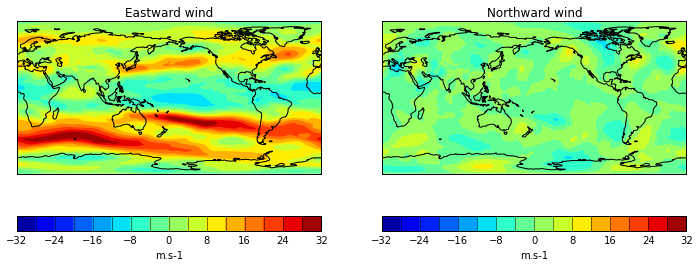

In [200]:
plot_winds(u_cube, v_cube)

## Rotating the wind

In [201]:
rotated_cs = iris.coord_systems.RotatedGeogCS(20, 260)
urot_cube, vrot_cube = iris.analysis.cartography.rotate_winds(u_cube, v_cube, rotated_cs)

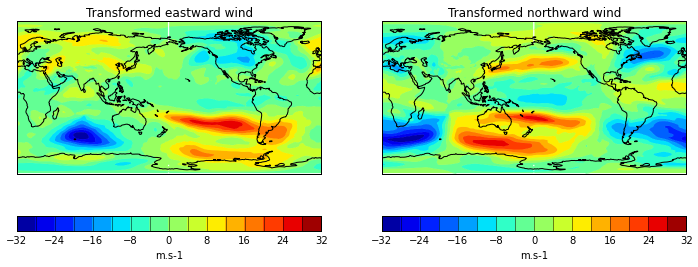

In [202]:
plot_winds(urot_cube, vrot_cube)

In [203]:
print vrot_cube

transformed_northward_wind / (m s**-1) (latitude: 241; longitude: 480)
     Dimension coordinates:
          latitude                              x               -
          longitude                             -               x
     Auxiliary coordinates:
          projection_x_coordinate               x               x
          projection_y_coordinate               x               x
     Scalar coordinates:
          time: 2006-06-22 06:00:00
     Attributes:
          CDI: Climate Data Interface version 1.5.3 (http://code.zmaw.de/projects/cdi...
          CDO: Climate Data Operators version 1.5.3 (http://code.zmaw.de/projects/cdo...
          Conventions: CF-1.0
          history: Mon Jun 15 13:04:23 2015: ncatted -O -a axis,time,c,c,T va_ERAInterim_500hPa_2006-030day-runmean_native.nc
Mon...
          level: 500hPa
          nco_openmp_thread_number: 1


In [204]:
#vrot_cube.data.flatten()
#vrot_cube.aux_coords

In [205]:
vrot_cube.coords()

[DimCoord(array([-90.  , -89.25, -88.5 , -87.75, -87.  , -86.25, -85.5 , -84.75,
        -84.  , -83.25, -82.5 , -81.75, -81.  , -80.25, -79.5 , -78.75,
        -78.  , -77.25, -76.5 , -75.75, -75.  , -74.25, -73.5 , -72.75,
        -72.  , -71.25, -70.5 , -69.75, -69.  , -68.25, -67.5 , -66.75,
        -66.  , -65.25, -64.5 , -63.75, -63.  , -62.25, -61.5 , -60.75,
        -60.  , -59.25, -58.5 , -57.75, -57.  , -56.25, -55.5 , -54.75,
        -54.  , -53.25, -52.5 , -51.75, -51.  , -50.25, -49.5 , -48.75,
        -48.  , -47.25, -46.5 , -45.75, -45.  , -44.25, -43.5 , -42.75,
        -42.  , -41.25, -40.5 , -39.75, -39.  , -38.25, -37.5 , -36.75,
        -36.  , -35.25, -34.5 , -33.75, -33.  , -32.25, -31.5 , -30.75,
        -30.  , -29.25, -28.5 , -27.75, -27.  , -26.25, -25.5 , -24.75,
        -24.  , -23.25, -22.5 , -21.75, -21.  , -20.25, -19.5 , -18.75,
        -18.  , -17.25, -16.5 , -15.75, -15.  , -14.25, -13.5 , -12.75,
        -12.  , -11.25, -10.5 ,  -9.75,  -9.  ,  -8.25,

In [206]:
x_values = vrot_cube.coord('projection_x_coordinate').points
y_values = vrot_cube.coord('projection_y_coordinate').points
lats = vrot_cube.coord('latitude').points
lons = vrot_cube.coord('longitude').points

print x_values.min(), x_values.max()
print y_values.min(), y_values.max()

-180.0 180.0
-89.6570701505 89.6570701505


In [207]:
x_values_360 = numpy.where(x_values < 0, x_values + 360, x_values)

print x_values_360.min(), x_values_360.max()

1.62904720934e-17 360.0


In [208]:
print lats[10]
print lons[65]

-82.5
48.75


In [209]:
print 'new lon:', x_values[10, 65]
print 'new lat:', y_values[10, 65]

new lon: -175.666090903
new lat: -26.3563651396


In [210]:
lon_mesh, lat_mesh = numpy.meshgrid(lons, lats)

lat_flat = lat_mesh.flatten()
lon_flat = lon_mesh.flatten()

x_flat_360 = x_values_360.flatten()
y_flat = y_values.flatten()

In [211]:
len(lat_flat)

115680

In [212]:
len(x_flat_360)

115680

In [213]:
def convert_point_1d(orig_lat, orig_lon):
    
    lat_indexes = numpy.where(lat_flat == orig_lat)
    lon_indexes = numpy.where(lon_flat == orig_lon)

    index = numpy.intersect1d(lat_indexes[0], lon_indexes[0])
    assert len(index) == 1
    
    print 'rotated lat (1D method):', y_flat[index]
    print 'rotated lon (1D method):', x_flat[index]
    
def convert_point_2d(orig_lat, orig_lon):
    
    lat_index = numpy.where(lats == orig_lat)
    lon_index = numpy.where(lons == orig_lon)
    
    print 'rotated lat (2D method):', y_values[lat_index, lon_index]
    print 'rotated lon (2D method):', x_values[lat_index, lon_index]

In [214]:
test_lat = 82.5
test_lon = 130.5

convert_point_1d(test_lat, test_lon)
convert_point_2d(test_lat, test_lon)


rotated lat (1D method): [ 15.13393305]
rotated lon (1D method): [-6.36245365]
rotated lat (2D method): [[ 15.13393305]]
rotated lon (2D method): [[ 5.98889898]]


## Regrid the data

In [215]:
points = numpy.column_stack((x_flat_360, y_flat))
values = vrot_cube.data.flatten()

grid_lons, grid_lats = numpy.mgrid[0:360,-90:91]                            
                            

regridded_data = scipy.interpolate.griddata(points, values, (grid_lons, grid_lats), 
                                            method='linear', fill_value=0)

In [216]:
print regridded_data.shape
print values.max(), values.max()
print regridded_data.max(), regridded_data.min()

(360, 181)
26.5006407752 26.5006407752
26.3966097119 -87788.367457


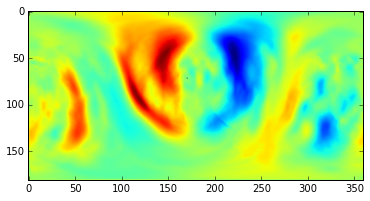

In [217]:
regridded_data_clean = numpy.where(regridded_data < values.min(), values.min(), regridded_data).T 
regridded_data_clean = numpy.where(regridded_data_clean > values.max(), values.max(), regridded_data_clean)

import matplotlib.pyplot
image = matplotlib.pyplot.imshow(regridded_data_clean)
matplotlib.pyplot.show(image)

In [218]:
regridded_data_clean.shape

(181, 360)

## Creating a cube from scratch

The documentation is [here](http://scitools.org.uk/iris/docs/latest/iris/iris/cube.html)

In [219]:
from iris.coords import DimCoord
from iris.cube import Cube

latitude = DimCoord(numpy.arange(-90, 91, 1),
                    standard_name='latitude',
                    units='degrees')
longitude = DimCoord(numpy.arange(0, 360, 1),                     
                     standard_name='longitude',
                     units='degrees')
new_cube = Cube(regridded_data_clean,
                dim_coords_and_dims=[(latitude, 0),
                                     (longitude, 1)])

new_cube.long_name = vrot_cube.long_name
new_cube.units = vrot_cube.units

In [220]:
print new_cube

transformed_northward_wind / (m s**-1) (latitude: 181; longitude: 360)
     Dimension coordinates:
          latitude                              x               -
          longitude                             -               x


In [221]:
new_cube_180 = new_cube.intersection(longitude=(-180, 180, True, True))

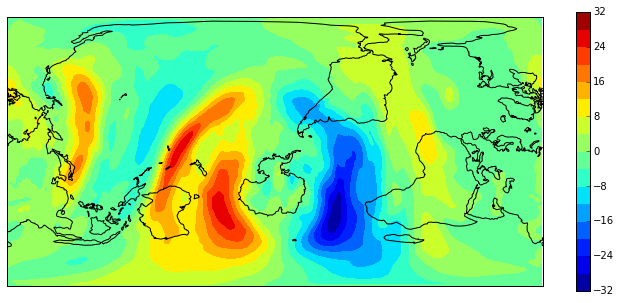

In [240]:
proj_180 = ccrs.RotatedPole(260, 20, central_rotated_longitude=180)
proj_0 = ccrs.RotatedPole(260, 20, central_rotated_longitude=0)
fig = plt.figure(figsize=(12, 5))

ax = plt.subplot(111, projection=proj_180)
x = new_cube.coord('longitude').points
y = new_cube.coord('latitude').points

ticks = numpy.arange(-32, 36, 4)
cf = ax.contourf(x, y, new_cube.data, levels=ticks, transform=proj_0)
plt.colorbar(cf)
plt.gca().coastlines()

iplt.show()

In [238]:
print new_cube_180.coords()

[DimCoord(array([-90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78,
       -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65,
       -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52,
       -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26,
       -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  8

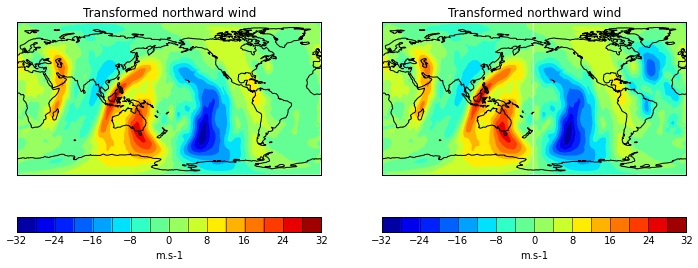

In [241]:
plot_winds(new_cube, new_cube_180)